In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

compensation_2015 = pd.read_csv("Resources/Programs/Compensation_by_County_2015.csv")
compensation_2017 = pd.read_csv("Resources/Programs/Compensation_by_County_2017.csv")
compensation_2020 = pd.read_csv("Resources/Programs/Compensation_by_County_2020.csv")
compensation_2021 = pd.read_csv("Resources/Programs/Compenstion_by_County_2021.csv")
program_users = pd.read_csv("Resources/Programs/Users_by_Program__2010_2021.csv")


compensation_2021

,FIPS code,State,County Name,Total: Disability Compensation Recipients,SCD rating: 0% to 20%,SCD rating: 30% to 40%,SCD rating: 50% to 60%,SCD rating: 70% to 90%,SCD rating: 100%,Age: 17-44,Age: 45-64,Age: 65 or older,Male,Female
0,1001.0,Alabama,Autauga,2077.0,424.0,262.0,278.0,650.0,463.0,499.0,991.0,587.0,1743.0,334.0
1,1003.0,Alabama,Baldwin,5174.0,1500.0,766.0,771.0,1270.0,867.0,993.0,1589.0,2592.0,4730.0,444.0
2,1005.0,Alabama,Barbour,616.0,116.0,73.0,99.0,198.0,130.0,97.0,248.0,271.0,545.0,71.0
3,1007.0,Alabama,Bibb,281.0,63.0,45.0,38.0,81.0,54.0,57.0,100.0,124.0,255.0,26.0
4,1009.0,Alabama,Blount,771.0,190.0,116.0,110.0,231.0,124.0,168.0,220.0,383.0,722.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,56045.0,Wyoming,Weston,209.0,93.0,29.0,29.0,38.0,20.0,38.0,48.0,123.0,197.0,12.0
3142,72000.0,Puerto Rico,All Counties,26648.0,4589.0,2848.0,3339.0,8428.0,7444.0,4692.0,8989.0,12967.0,24969.0,1679.0
3143,88888.0,US Territories,US Territories,4755.0,925.0,627.0,637.0,1518.0,1048.0,1177.0,2082.0,1496.0,4173.0,582.0
3144,0.0,Other Foreign Countries,Other Foreign Countries,21674.0,3737.0,3106.0,3329.0,6894.0,4608.0,6515.0,11670.0,3488.0,18323.0,3351.0


<Axes: xlabel='Year', ylabel='Compensation or Pension'>

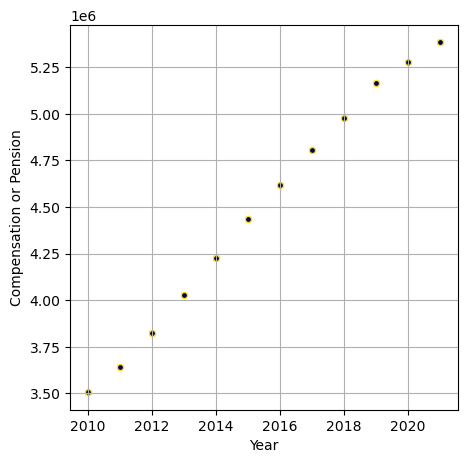

In [13]:
#graph of users
program_users.plot(kind="scatter", x="Year", y="Compensation or Pension", 
                  color = '#00035b', edgecolor ='#ffdf22', grid = True, figsize = (5,5))

In [14]:
compensation_2017 = compensation_2017[['State', 'County', 'Total: Compensation',  'Male Recipients: Compensation OR Pension',
       'Female Recipients: Compensation OR Pension']]
compensation_2015 = compensation_2015[['State', 'County',' Total: Compensation only ',
       ' Males: Compensation OR Pension ',
       ' Females: Compensation OR Pension ']]
compensation_2020 = compensation_2020[['State', 'County Name',
                                       'Total: Disability Compensation Recipients', 
                                       'Male', 'Female']]
compensation_2021 = compensation_2021[['State', 'County Name',
                                       'Total: Disability Compensation Recipients', 
                                       'Male', 'Female']]
compensation_2017 = compensation_2017.rename(columns={"Male Recipients: Compensation OR Pension":"Male Compensation",
                                                        "Female Recipients: Compensation OR Pension":"Female Compensation"})
compensation_2020 =compensation_2020.rename(columns={"County Name": "County", 
                                                     "Total: Disability Compensation Recipients":"Total: Compensation",
                                                    "Male":"Male Compensation",
                                                    "Female":"Female Compensation"})
compensation_2021 =compensation_2021.rename(columns={"County Name": "County", 
                                                     "Total: Disability Compensation Recipients":"Total: Compensation",
                                                    "Male":"Male Compensation",
                                                    "Female":"Female Compensation"})
compensation_2015 = compensation_2015.rename(columns={" Total: Compensation only ":"Total: Compensation",
                                                        " Males: Compensation OR Pension ":"Male Compensation",
                                                     ' Females: Compensation OR Pension ':"Female Compensation"})
combined_compensation = pd.merge(compensation_2015, compensation_2017,
                                 how='outer', on=['County', 'State'])
combined_compensation = combined_compensation.rename(columns={"Total: Compensation_x":"Total: Compensation 2015",
                                                     'Male Compensation_x':"Male Compensation 2015",
                                                             "Female Compensation_x":"Female Compensation 2015",
                                                             "Total: Compensation_y":"Total: Compensation 2017",
                                                            "Male Compensation_y":"Male Compensation 2017",
                                                             "Female Compensation_y":"Female Compensation 2017"})
combined_compensation = pd.merge(combined_compensation, compensation_2020,
                                 how='outer', on=['County', 'State'])
combined_compensation = combined_compensation.rename(columns={"Total: Compensation":"Total: Compensation 2020",
                                                     'Male Compensation':"Male Compensation 2020",
                                                             "Female Compensation":"Female Compensation 2020"})
combined_compensation = pd.merge(combined_compensation, compensation_2021,
                                 how='outer', on=['County', 'State'])
combined_compensation = combined_compensation.rename(columns={"Total: Compensation":"Total: Compensation 2021",
                                                     'Male Compensation':"Male Compensation 2021",
                                                             "Female Compensation":"Female Compensation 2021"})
combined_compensation = combined_compensation.dropna()
combined_compensation = combined_compensation.replace(" ** ",0)
combined_compensation

,State,County,Total: Compensation 2015,Male Compensation 2015,Female Compensation 2015,Total: Compensation 2017,Male Compensation 2017,Female Compensation 2017,Total: Compensation 2020,Male Compensation 2020,Female Compensation 2020,Total: Compensation 2021,Male Compensation 2021,Female Compensation 2021
0,Alabama,Autauga,"1,849","1,657",248,"1,970","1,722",300,2000.0,1687.0,313.0,2077.0,1743.0,334.0
1,Alabama,Baldwin,"3,663","3,671",277,"4,245","4,155",333,5073.0,4648.0,425.0,5174.0,4730.0,444.0
2,Alabama,Barbour,523,524,54,504,501,54,605.0,537.0,68.0,616.0,545.0,71.0
3,Alabama,Bibb,248,293,20,266,296,22,278.0,252.0,26.0,281.0,255.0,26.0
4,Alabama,Blount,660,734,20,601,635,29,771.0,724.0,47.0,771.0,722.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,Wyoming,Teton,102,99,0,128,118,11,156.0,141.0,15.0,159.0,144.0,15.0
3145,Wyoming,Uinta,234,227,23,289,277,21,307.0,280.0,27.0,315.0,286.0,29.0
3146,Wyoming,Washakie,84,83,0,107,105,0,130.0,119.0,11.0,136.0,123.0,13.0
3147,Wyoming,Weston,112,109,0,35,34,0,209.0,198.0,11.0,209.0,197.0,12.0


In [15]:
#pd.to_numeric(combined_compensation["Total: Compensation 2015"] , downcast="integer")
for i in range(len(combined_compensation.index)):
    for j in range(len(combined_compensation.columns)):
        try:
            combined_compensation.iloc[i,j] = combined_compensation.iloc[i,j].replace(",","").strip()
            
        except: 
            pass


In [16]:
combined_compensation["Total: Compensation 2015"] = combined_compensation["Total: Compensation 2015"].astype('float64')
combined_compensation["Male Compensation 2015"] = combined_compensation["Male Compensation 2015"].astype('float64')
combined_compensation["Female Compensation 2015"] = combined_compensation["Female Compensation 2015"].astype('float64')
combined_compensation["Total: Compensation 2017"] = combined_compensation["Total: Compensation 2017"].astype('float64')
combined_compensation["Male Compensation 2017"] = combined_compensation["Male Compensation 2017"].astype('float64')
combined_compensation["Female Compensation 2017"] = combined_compensation["Female Compensation 2017"].astype('float64')
combined_compensation

,State,County,Total: Compensation 2015,Male Compensation 2015,Female Compensation 2015,Total: Compensation 2017,Male Compensation 2017,Female Compensation 2017,Total: Compensation 2020,Male Compensation 2020,Female Compensation 2020,Total: Compensation 2021,Male Compensation 2021,Female Compensation 2021
0,Alabama,Autauga,1849.0,1657.0,248.0,1970.0,1722.0,300.0,2000.0,1687.0,313.0,2077.0,1743.0,334.0
1,Alabama,Baldwin,3663.0,3671.0,277.0,4245.0,4155.0,333.0,5073.0,4648.0,425.0,5174.0,4730.0,444.0
2,Alabama,Barbour,523.0,524.0,54.0,504.0,501.0,54.0,605.0,537.0,68.0,616.0,545.0,71.0
3,Alabama,Bibb,248.0,293.0,20.0,266.0,296.0,22.0,278.0,252.0,26.0,281.0,255.0,26.0
4,Alabama,Blount,660.0,734.0,20.0,601.0,635.0,29.0,771.0,724.0,47.0,771.0,722.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,Wyoming,Teton,102.0,99.0,0.0,128.0,118.0,11.0,156.0,141.0,15.0,159.0,144.0,15.0
3145,Wyoming,Uinta,234.0,227.0,23.0,289.0,277.0,21.0,307.0,280.0,27.0,315.0,286.0,29.0
3146,Wyoming,Washakie,84.0,83.0,0.0,107.0,105.0,0.0,130.0,119.0,11.0,136.0,123.0,13.0
3147,Wyoming,Weston,112.0,109.0,0.0,35.0,34.0,0.0,209.0,198.0,11.0,209.0,197.0,12.0


In [17]:
max_2015 = combined_compensation.loc[combined_compensation["Total: Compensation 2015"].idxmax()][["State","County", "Total: Compensation 2015"]]
max_2017 = combined_compensation.loc[combined_compensation["Total: Compensation 2017"].idxmax()][["State","County","Total: Compensation 2017"]]
max_2020= combined_compensation.loc[combined_compensation["Total: Compensation 2020"].idxmax()][["State","County", "Total: Compensation 2020"]]
max_male_2015 = combined_compensation.loc[combined_compensation["Male Compensation 2015"].idxmax()][["State","County", "Total: Compensation 2015"]]
max_female_2015 = combined_compensation.loc[combined_compensation["Female Compensation 2015"].idxmax()][["State","County", "Female Compensation 2015"]]
max_male_2017 = combined_compensation.loc[combined_compensation["Male Compensation 2017"].idxmax()][["State","County", "Male Compensation 2017"]]
max_female_2017 = combined_compensation.loc[combined_compensation["Female Compensation 2017"].idxmax()][["State","County", "Female Compensation 2017"]]
max_male_2020 = combined_compensation.loc[combined_compensation["Male Compensation 2020"].idxmax()][["State","County", "Male Compensation 2020"]]
max_female_2020 = combined_compensation.loc[combined_compensation["Female Compensation 2020"].idxmax()][["State","County", "Female Compensation 2020"]]



# max_2015[["State","County","Total: Compensation 2020", "Total: Compensation 2015"]]

# max_2017 = pd.DataFrame(max_2017)
# max_2020 = pd.DataFrame(max_2020)
# max_male_2015 = pd.DataFrame({max_male_2015,max_female_2015}).T
# max_male_2015
max_summary = pd.DataFrame({"Total Max 2015":max_2015,
                                 "Total Max 2017":max_2017,
                                 "Total Max 2020":max_2020,
                           "Female Max 2015": max_female_2015,
                           "Male Max 2015": max_male_2015,
                           "Max Female 2017": max_female_2017,
                           "Max Male 2017": max_male_2017,
                           "Max Female 2020": max_female_2020,
                           "Max Male 2020": max_female_2020})


In [24]:
state_max = combined_compensation.groupby(["State"]).max()

def get_max_state(title):
    max_male_2015 = combined_compensation.groupby(["State"])[title].idxmax()
    max2015_male_list = []
    max_male_1 = combined_compensation.groupby(["State"]).max()[title]
    max_male_2 = pd.DataFrame(max_male_1)
    for index in max_male_2015:
        max2015_male_list.append(combined_compensation.loc[index, "County"])
    max_male_3 = max_male_2.reset_index()
    male_2015_total = max_male_3[title]
    states = max_male_3["State"]
    male_2015_max_total = pd.DataFrame({"State": states,
                                        "County": max2015_male_list,
                                        title : male_2015_total}).sort_values(by = [title],
                                                                  ascending=False)
    return male_2015_max_total

In [126]:
title = "Total: Compensation 2015"
title1 = "Female Compensation 2015"
title2 = "Male Compensation 2015"
title4 = "Total: Compensation 2017"
title5 = "Female Compensation 2017"
title6 = "Male Compensation 2017"
title7 = "Total: Compensation 2020"
title8 = "Female Compensation 2020"
title9 = "Male Compensation 2020"
title10 = "Total: Compensation 2021"
title11 = "Female Compensation 2021"
title12 = "Male Compensation 2021"

max_compensation_2015 = get_max_state(title)
max_femalecompensation_2015 = get_max_state(title1)
max_malecompensation_2015 = get_max_state(title2)
max_compensation_2017 = get_max_state(title4)
max_femalecompensation_2017 = get_max_state(title5)
max_malecompensation_2017 = get_max_state(title6)
max_compensation_2020 = get_max_state(title7)
max_femalecompensation_2020 = get_max_state(title8)
max_malecompensation_2020 = get_max_state(title9)
max_compensation_2021 = get_max_state(title10)
max_femalecompensation_2021 = get_max_state(title11)
max_malecompensation_2021 = get_max_state(title12)
max_malecompensation_2021head = max_malecompensation_2021.head(10)
max_malecompensation_2021head


,State,County,Male Compensation 2021
4,California,San Diego,81036.0
2,Arizona,Maricopa,59935.0
43,Texas,Bexar,57302.0
27,Nevada,Clark,39995.0
5,Colorado,El Paso,34384.0
12,Illinois,Cook,30148.0
47,Washington,Pierce,29223.0
8,Florida,Hillsborough,26543.0
10,Hawaii,Honolulu,25519.0
38,Puerto Rico,All Counties,24969.0


In [96]:
san_diego =combined_compensation.loc[combined_compensation['County']== "San Diego"].T.reset_index()
san_diego = san_diego.rename(columns={222:"Values San Diego"})
total_san_diego = san_diego[san_diego['index'].str.contains('Total: Compensation')]
total_san_diego

,index,Values San Diego
2,Total: Compensation 2015,71268.0
5,Total: Compensation 2017,74249.0
8,Total: Compensation 2020,88830.0
11,Total: Compensation 2021,94181.0


<Axes: xlabel='index', ylabel='Values San Diego'>

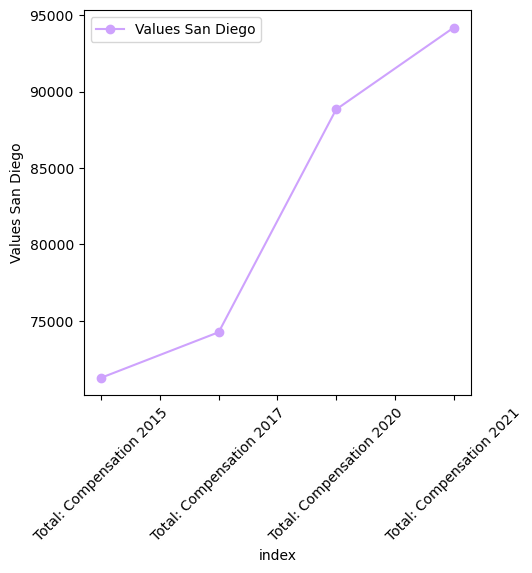

In [127]:
total_san_diego.plot(kind="line", x="index", y="Values San Diego",
                  ylabel = "Values San Diego", color = '#cea2fd', 
                     marker = "o", figsize = (5,5), rot = 45)

In [116]:
indexes = []
san_diego_list = [2,5,8,11]
def get_county_name(index):
    county_name = total_san_diego.iloc[index, 1]
    return county_name

for index in range(len(total_san_diego)):
    county_name = get_county_name(index)
    indexes.append(index)


san_diego_values = []
for i in san_diego_list:
        san_diego_values.append(total_san_diego.loc[i, "Values San Diego"])

san_diego_values

[71268.0, 74249.0, 88830.0, 94181.0]

In [117]:
d = {"Total Compensation":[max_compensation_2015['Total: Compensation 2015'].max(),max_compensation_2017['Total: Compensation 2017'].max(),max_compensation_2020['Total: Compensation 2020'].max(), max_compensation_2021['Total: Compensation 2021'].max()],
    "Male Compensation":[max_malecompensation_2015['Male Compensation 2015'].max(), max_malecompensation_2017['Male Compensation 2017'].max(), max_malecompensation_2020['Male Compensation 2020'].max(), max_malecompensation_2021['Male Compensation 2021'].max()],
    "Female Compensation":[max_femalecompensation_2015['Female Compensation 2015'].max(), max_femalecompensation_2017['Female Compensation 2017'].max(),max_femalecompensation_2020['Female Compensation 2020'].max(), max_femalecompensation_2021['Female Compensation 2021'].max()],
    "San Diego": san_diego_values}


i = ["Max 2015", "Max 2017", "Max 2020", "Max 2021"]

totals = pd.DataFrame(d, i)

totals

,Total Compensation,Male Compensation,Female Compensation,San Diego
Max 2015,71268.0,65708.0,9671.0,71268.0
Max 2017,74249.0,67550.0,11164.0,74249.0
Max 2020,88830.0,76847.0,11983.0,88830.0
Max 2021,94181.0,81036.0,13145.0,94181.0


<Axes: ylabel='Total Max over Years'>

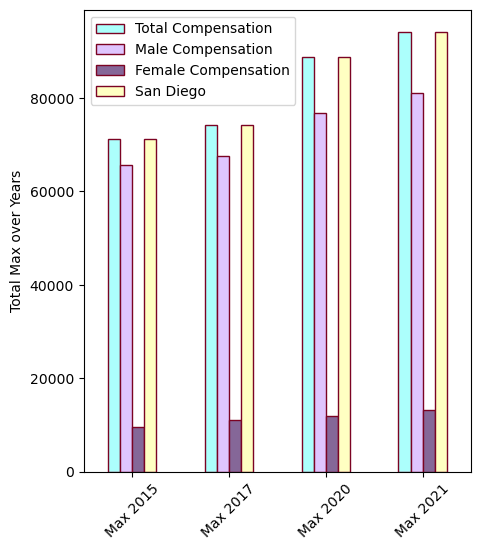

In [124]:
#"#b1d1fc",
totals.plot(kind="bar", ylabel = "Total Max over Years", figsize = (5,6), 
            color ={"#856798","#ffffc2","#acfffc", "#dfc5fe"}, rot = 45, edgecolor ='#7b0323')

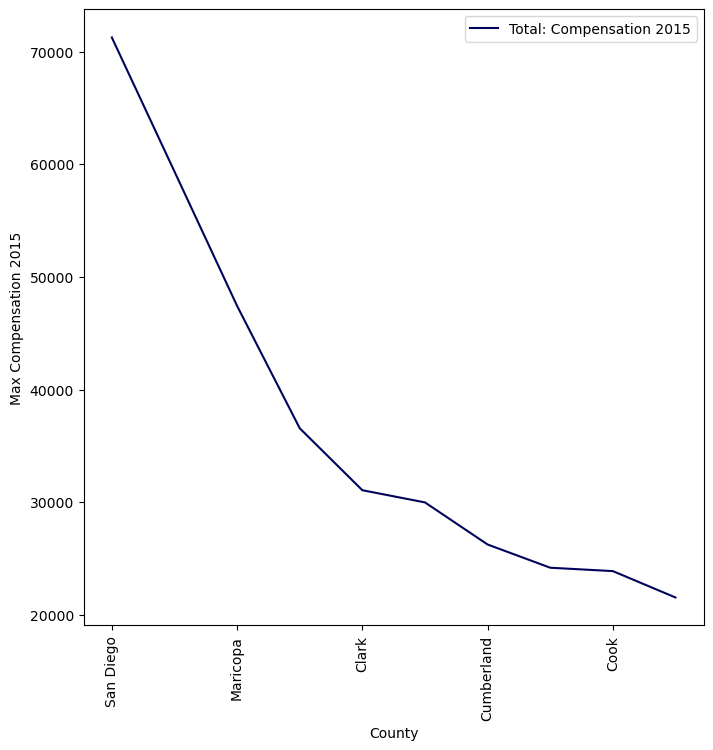

In [128]:
max_compensation_2015.head(10).plot(kind="line", x="County", y="Total: Compensation 2015",
                  ylabel = "Max Compensation 2015", color = '#00035b', figsize = (8,8), 
                                    rot = 90)
plt.show()